In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

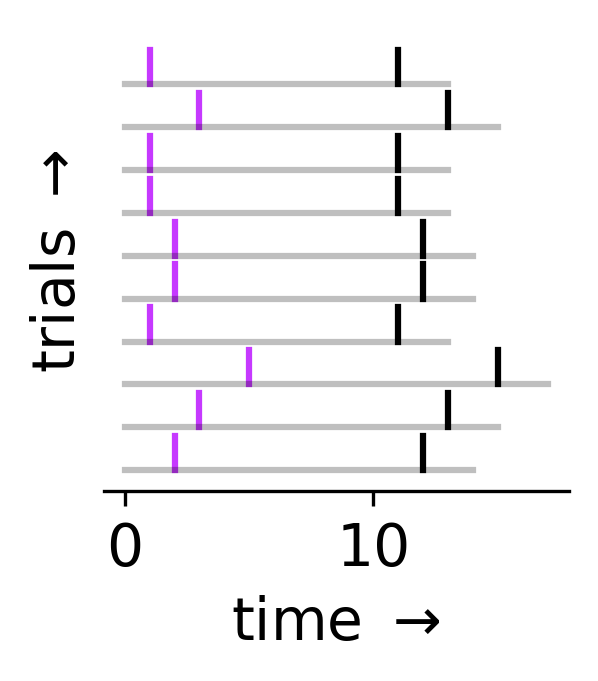

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 0.2051
Epoch 200, 0.1640
Epoch 400, 0.1617
Epoch 600, 0.1611
Epoch 800, 0.1609
Epoch 1000, 0.1609
Epoch 1200, 0.1608
Epoch 1400, 0.1608
Epoch 1600, 0.1607
Epoch 1800, 0.1608
Epoch 2000, 0.1609
Epoch 2200, 0.1609
Epoch 2400, 0.1611
Epoch 2600, 0.1613
Epoch 2800, 0.1613
Epoch 3000, 0.1613
Epoch 3200, 0.1613
Epoch 3400, 0.1613
Epoch 3600, 0.1613
Epoch 3800, 0.1612
Epoch 4000, 0.1612
Epoch 4200, 0.1611
Epoch 4400, 0.1611
Epoch 4600, 0.1610
Epoch 4800, 0.1610
Epoch 5000, 0.1610
Epoch 5200, 0.1609
Epoch 5400, 0.1609
Epoch 5600, 0.1609
Epoch 5800, 0.1607
Epoch 6000, 0.1608
Epoch 6200, 0.1607
Epoch 6400, 0.1606
Epoch 6600, 0.1607
Epoch 6800, 0.1606
Done! Best loss: 0.16045424789190293


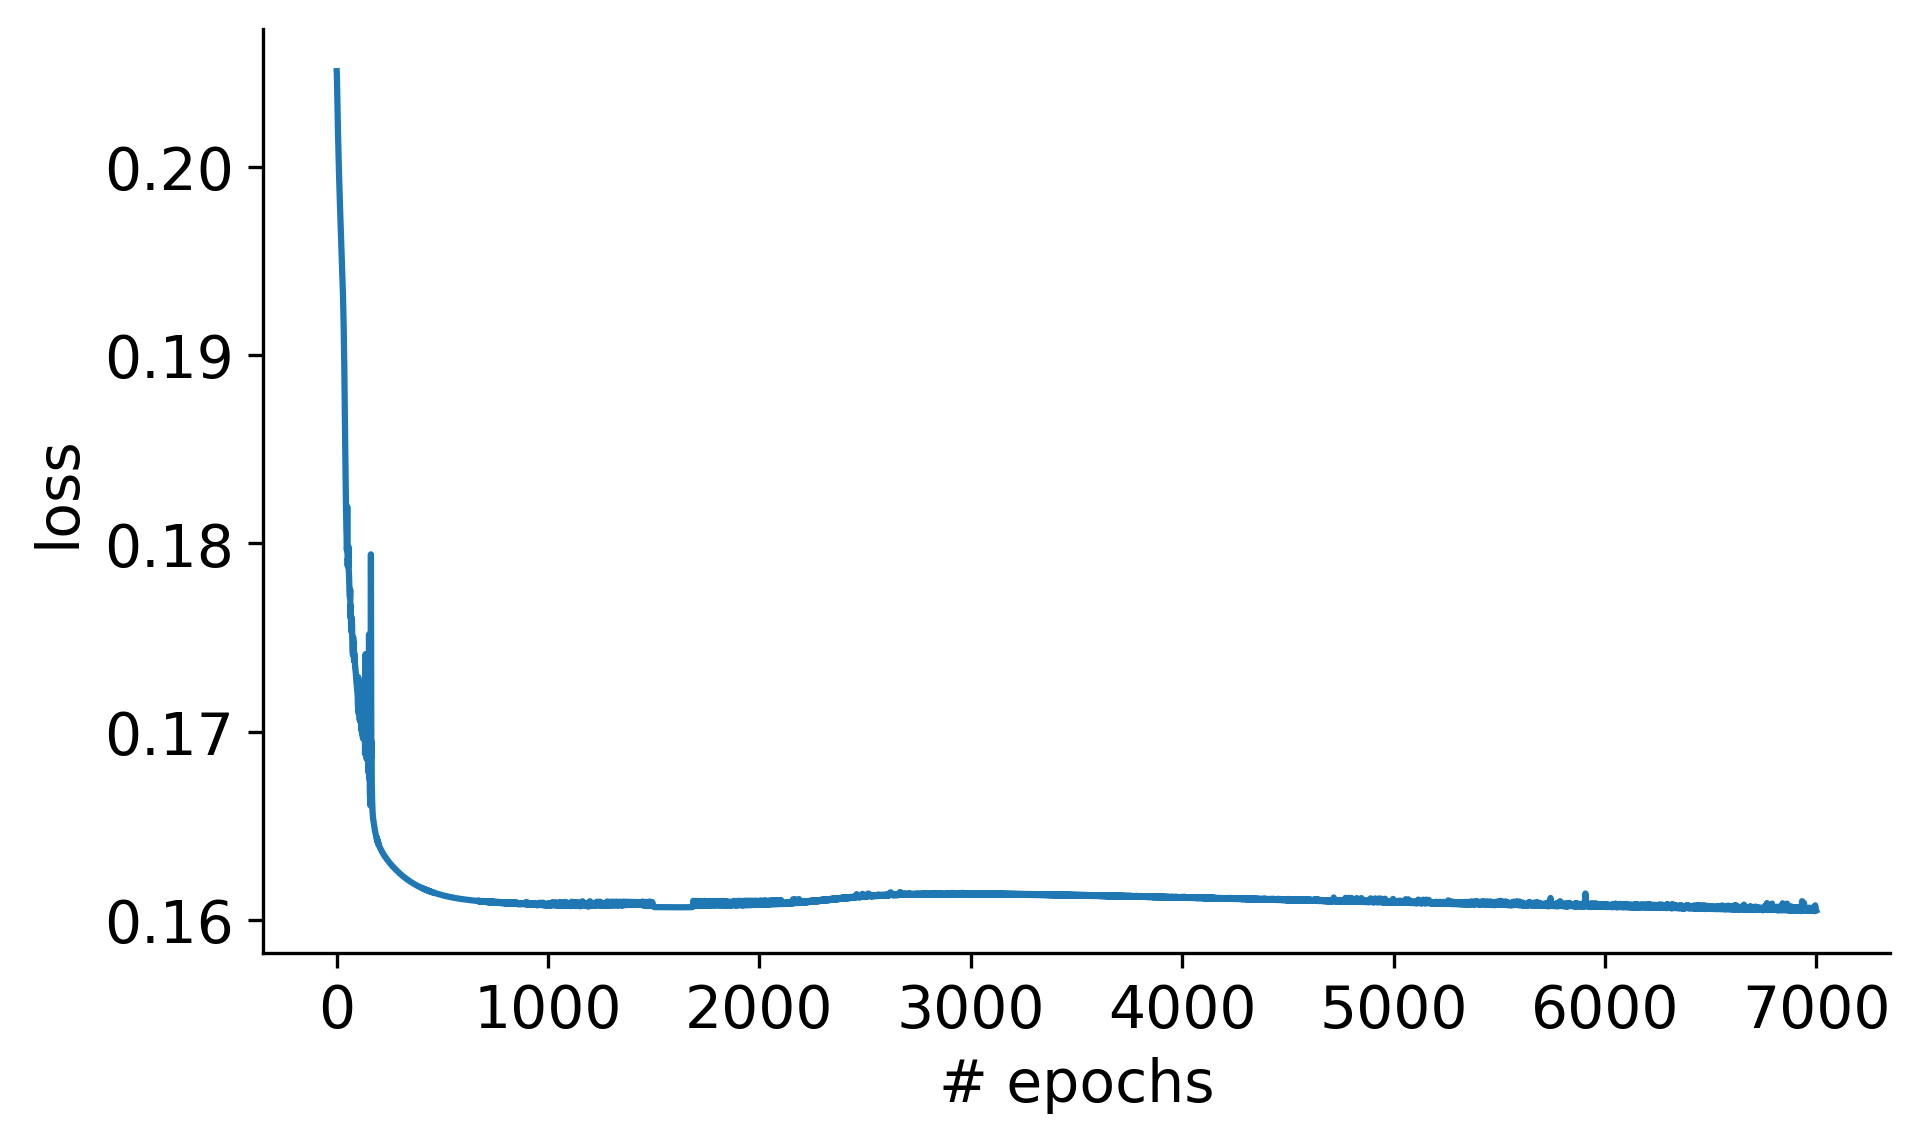

In [4]:
lr = 1
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=7000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

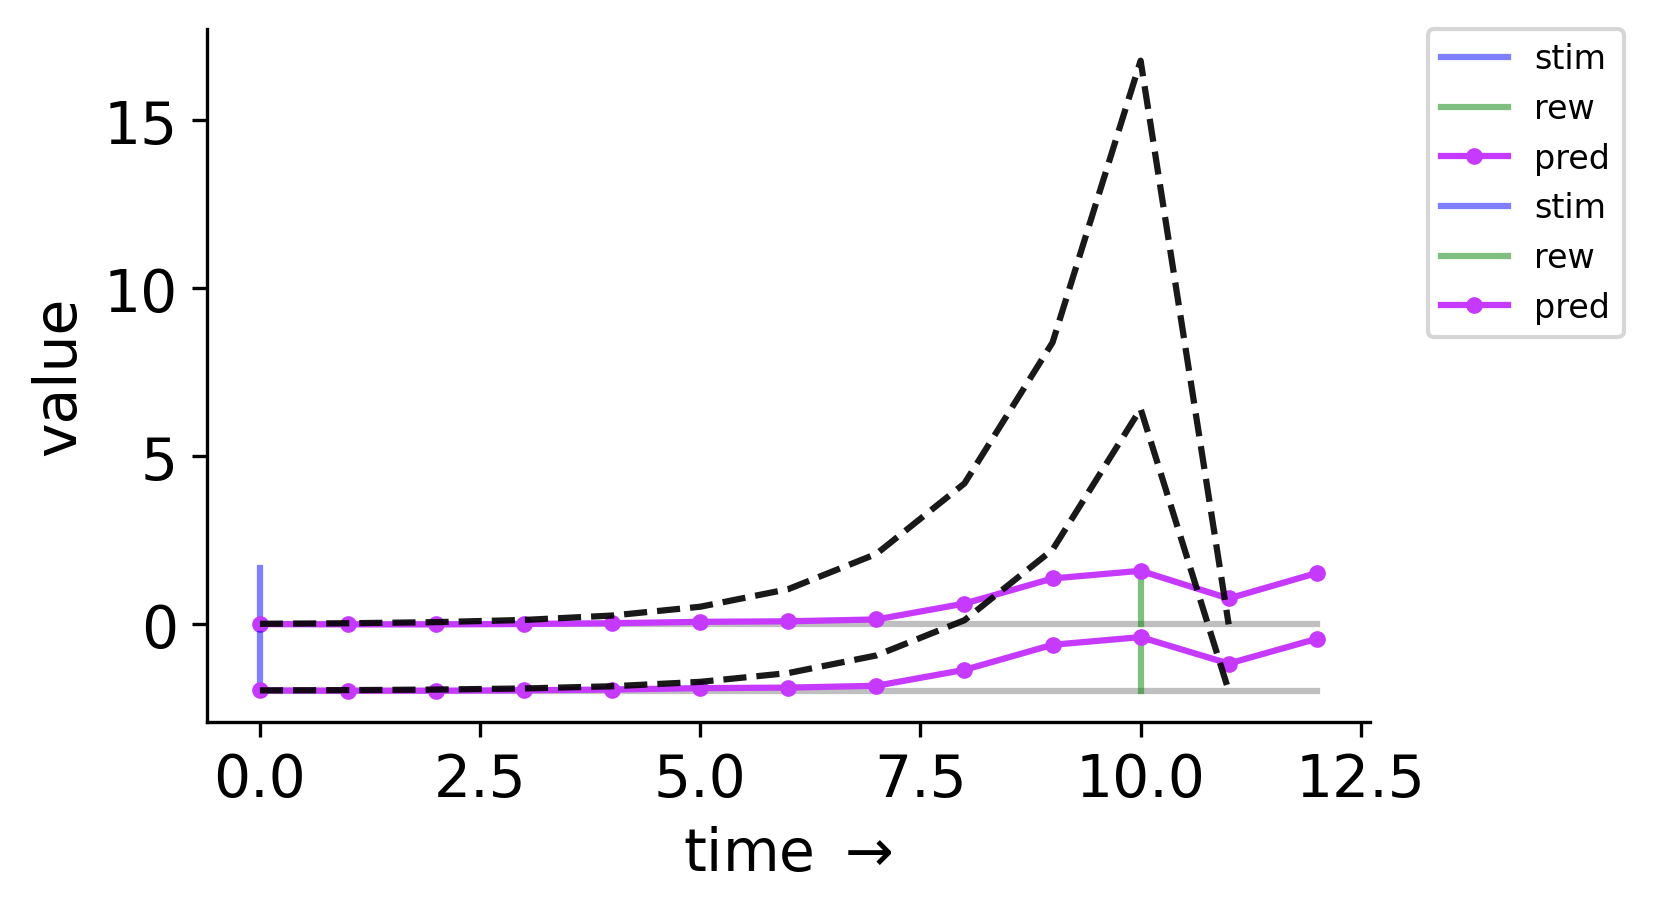

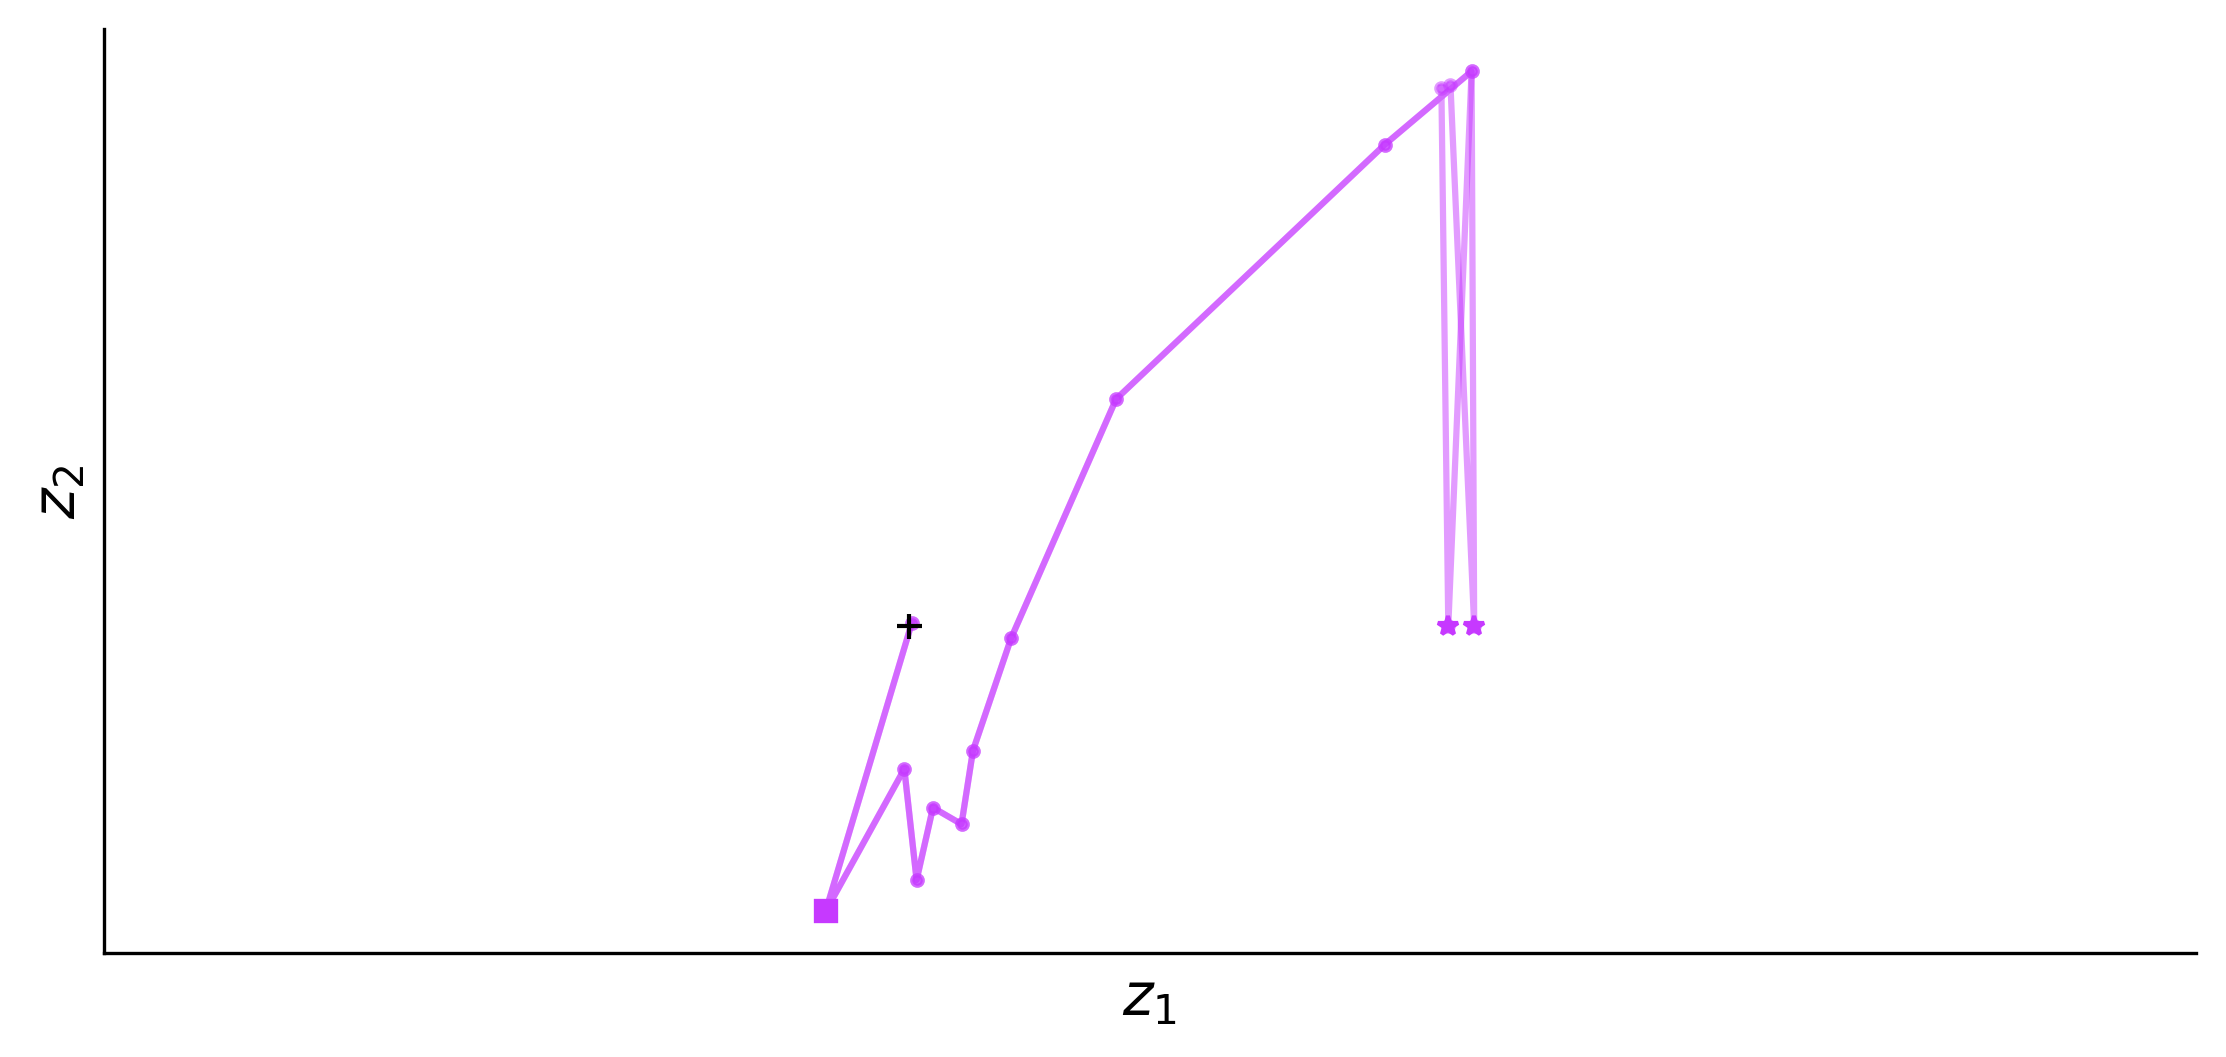

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])